In [7]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

INPUT_SIZE = 28 * 28 
NUM_CLASSES = 10
BATCH_SIZE = 500 
EPOCHS = 5         
SEED = 42          

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = datasets.MNIST(root='../data', train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(root='../data', train=False, transform=transform, download=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

## SGD

In [12]:
# --- Loss Function ---
criterion = nn.CrossEntropyLoss() 
all_loss_histories = {}

# --- Learning Rates ---
LEARNING_RATES = [0.5, 0.3, 0.1, 0.05, 0.03, 0.01]

for lr in LEARNING_RATES:
    print(f"--- Starting Training for Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            output = model(data)
            loss = criterion(output, target)
            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    # Update loss history
    all_loss_histories[lr] = loss_history

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")

--- Starting Training for Learning Rate: 0.5 ---
LR: 0.5, Epoch [1/5], Final Batch Loss: 0.43778
LR: 0.5, Epoch [2/5], Final Batch Loss: 1.05968
LR: 0.5, Epoch [3/5], Final Batch Loss: 0.30559
LR: 0.5, Epoch [4/5], Final Batch Loss: 0.29996
LR: 0.5, Epoch [5/5], Final Batch Loss: 0.98768
Final Accuracy for LR 0.5: 90.49%

--- Starting Training for Learning Rate: 0.3 ---
LR: 0.3, Epoch [1/5], Final Batch Loss: 0.37455
LR: 0.3, Epoch [2/5], Final Batch Loss: 0.43427
LR: 0.3, Epoch [3/5], Final Batch Loss: 0.25786
LR: 0.3, Epoch [4/5], Final Batch Loss: 0.25258
LR: 0.3, Epoch [5/5], Final Batch Loss: 0.45054
Final Accuracy for LR 0.3: 90.87%

--- Starting Training for Learning Rate: 0.1 ---
LR: 0.1, Epoch [1/5], Final Batch Loss: 0.35321
LR: 0.1, Epoch [2/5], Final Batch Loss: 0.28168
LR: 0.1, Epoch [3/5], Final Batch Loss: 0.24737
LR: 0.1, Epoch [4/5], Final Batch Loss: 0.25600
LR: 0.1, Epoch [5/5], Final Batch Loss: 0.21478
Final Accuracy for LR 0.1: 92.05%

--- Starting Training for Le

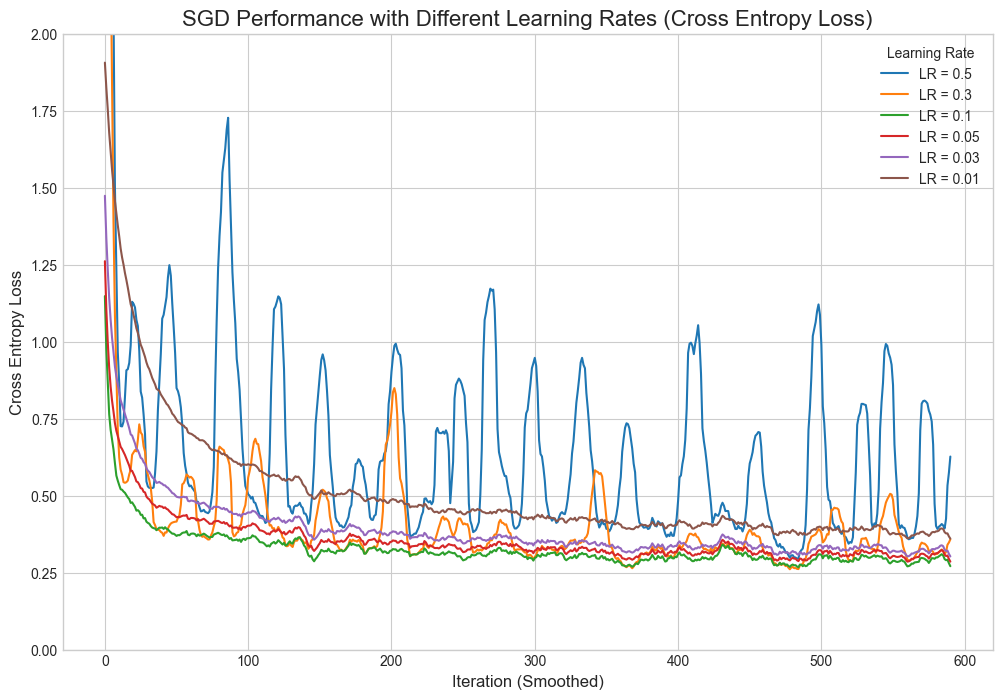

In [13]:
# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
for lr, history in all_loss_histories.items():
    window_size = 10
    smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
    plt.plot(smoothed_history, label=f'LR = {lr}')
plt.title('SGD Performance with Different Learning Rates (Cross Entropy Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Cross Entropy Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 2)
plt.show()

## ADAM

In [16]:
LEARNING_RATES = [0.05, 0.01, 0.005, 0.001, 0.0005]
criterion = nn.CrossEntropyLoss() 
all_loss_histories = {}

for lr in LEARNING_RATES:
    print(f"--- Starting Training for Adam with Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            output = model(data)
            loss = criterion(output, target)
            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    all_loss_histories[lr] = loss_history

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")

--- Starting Training for Adam with Learning Rate: 0.05 ---
LR: 0.05, Epoch [1/5], Final Batch Loss: 0.57175
LR: 0.05, Epoch [2/5], Final Batch Loss: 0.57260
LR: 0.05, Epoch [3/5], Final Batch Loss: 0.44272
LR: 0.05, Epoch [4/5], Final Batch Loss: 0.68330
LR: 0.05, Epoch [5/5], Final Batch Loss: 0.49365
Final Accuracy for LR 0.05: 88.51%

--- Starting Training for Adam with Learning Rate: 0.01 ---
LR: 0.01, Epoch [1/5], Final Batch Loss: 0.30413
LR: 0.01, Epoch [2/5], Final Batch Loss: 0.26148
LR: 0.01, Epoch [3/5], Final Batch Loss: 0.22538
LR: 0.01, Epoch [4/5], Final Batch Loss: 0.24626
LR: 0.01, Epoch [5/5], Final Batch Loss: 0.24631
Final Accuracy for LR 0.01: 91.06%

--- Starting Training for Adam with Learning Rate: 0.005 ---
LR: 0.005, Epoch [1/5], Final Batch Loss: 0.33000
LR: 0.005, Epoch [2/5], Final Batch Loss: 0.25186
LR: 0.005, Epoch [3/5], Final Batch Loss: 0.21791
LR: 0.005, Epoch [4/5], Final Batch Loss: 0.24423
LR: 0.005, Epoch [5/5], Final Batch Loss: 0.22854
Final A

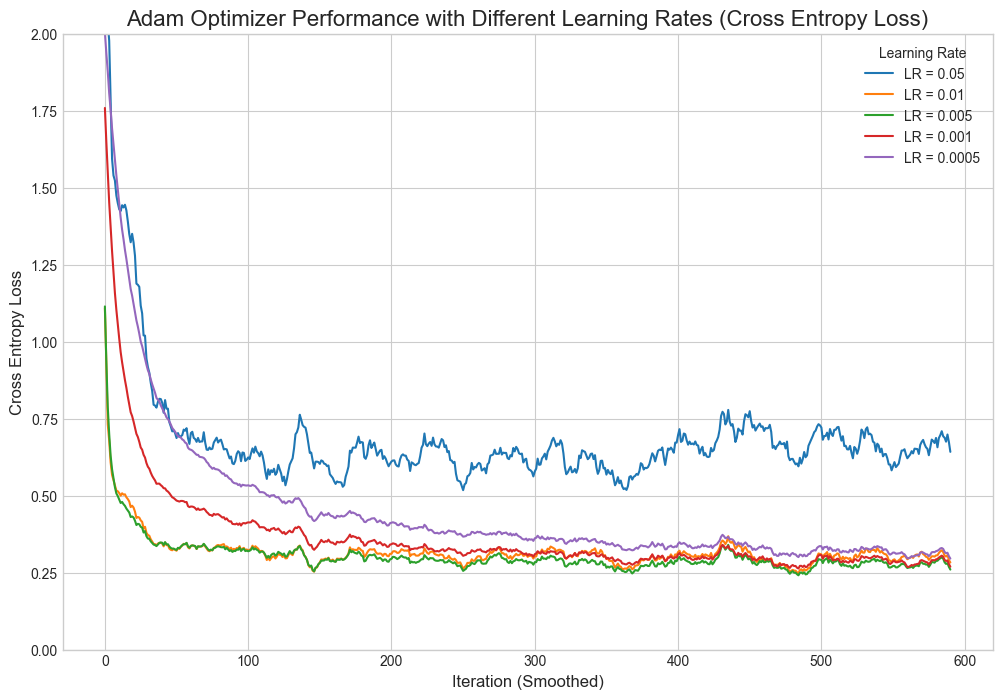

In [17]:
# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

for lr, history in all_loss_histories.items():
    window_size = 10
    if len(history) > window_size:
        smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_history, label=f'LR = {lr}')
    else:
        plt.plot(history, label=f'LR = {lr}')

plt.title('Adam Optimizer Performance with Different Learning Rates (Cross Entropy Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Cross Entropy Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 2)
plt.show()

## Default OLNM

In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
from olnm import OLNM as ORIGINAL_OLNM


In [34]:
LEARNING_RATES = [0.3, 0.1, 0.05, 0.01, 0.005]
criterion = nn.CrossEntropyLoss() 
all_loss_histories = {}

for lr in LEARNING_RATES:
    print(f"--- Starting Training for OLNM with Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = ORIGINAL_OLNM(model.parameters(), lr=lr, c=1789, batch_size=BATCH_SIZE)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            def closure(grad=True):
                output = model(data)
                loss = criterion(output, target)
                if grad:
                    optimizer.zero_grad()
                    loss.backward()
                return loss

            loss = optimizer.step(closure)

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    all_loss_histories[lr] = loss_history

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")

--- Starting Training for OLNM with Learning Rate: 0.3 ---
LR: 0.3, Epoch [1/5], Final Batch Loss: 0.44974
LR: 0.3, Epoch [2/5], Final Batch Loss: 0.96219
LR: 0.3, Epoch [3/5], Final Batch Loss: 0.31462
LR: 0.3, Epoch [4/5], Final Batch Loss: 0.56870
LR: 0.3, Epoch [5/5], Final Batch Loss: 0.33367
Final Accuracy for LR 0.3: 90.27%

--- Starting Training for OLNM with Learning Rate: 0.1 ---
LR: 0.1, Epoch [1/5], Final Batch Loss: 0.30173
LR: 0.1, Epoch [2/5], Final Batch Loss: 0.26384
LR: 0.1, Epoch [3/5], Final Batch Loss: 0.21390
LR: 0.1, Epoch [4/5], Final Batch Loss: 0.26244
LR: 0.1, Epoch [5/5], Final Batch Loss: 0.20963
Final Accuracy for LR 0.1: 91.59%

--- Starting Training for OLNM with Learning Rate: 0.05 ---
LR: 0.05, Epoch [1/5], Final Batch Loss: 0.30403
LR: 0.05, Epoch [2/5], Final Batch Loss: 0.24241
LR: 0.05, Epoch [3/5], Final Batch Loss: 0.21480
LR: 0.05, Epoch [4/5], Final Batch Loss: 0.24285
LR: 0.05, Epoch [5/5], Final Batch Loss: 0.20054
Final Accuracy for LR 0.05:

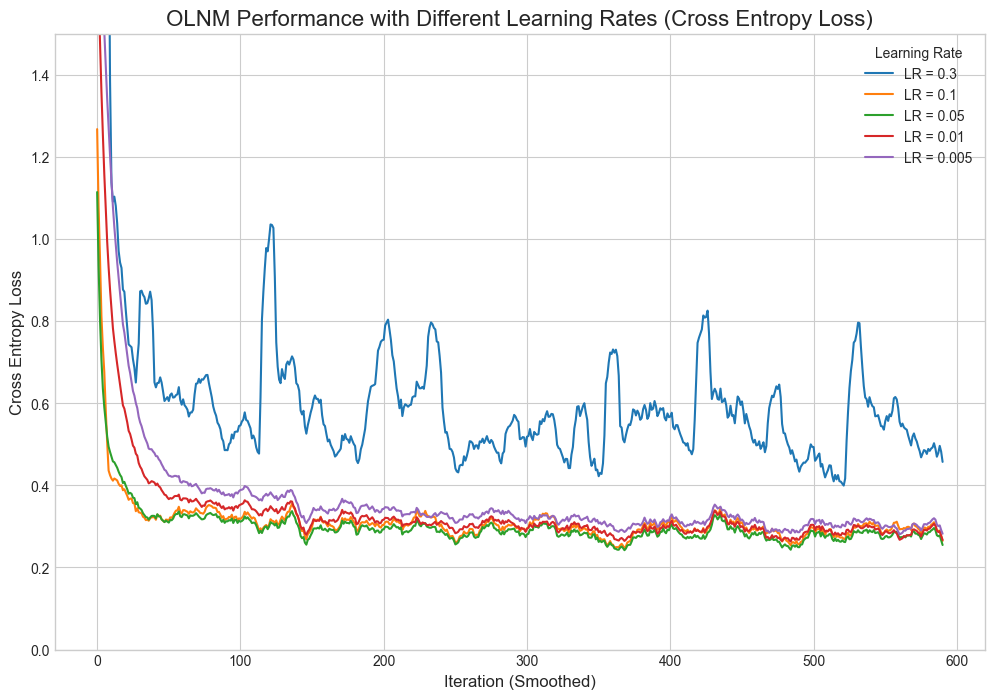

In [35]:
# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

for lr, history in all_loss_histories.items():
    window_size = 10
    if len(history) > window_size:
        smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_history, label=f'LR = {lr}')
    else:
        plt.plot(history, label=f'LR = {lr}')

plt.title('OLNM Performance with Different Learning Rates (Cross Entropy Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Cross Entropy Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 1.5)
plt.show()